In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Running Pyomo on Google Colab

Keywords: installation

This note notebook shows how to install the basic pyomo package on Google Colab, and then demonstrates the subsequent installation and use of various solvers including

* GLPK
* COIN-OR CBC
* COIN-OR Ipopt
* COIN-OR Bonmin
* COIN-OR Couenne
* COIN-OR Gecode

## Basic installation of Pyomo

We'll do a quiet installation of pyomo using `pip`.  This needs to be done once at the start of each Colab session.

In [ ]:
!pip install -q pyomo

The installation of pyomo can be verified by entering a simple model. We'll use the model again in subsequent cells to demonstrate the installation and execution of various solvers.

In [ ]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# declare objective
model.profit = Objective(expr = 40*model.x + 30*model.y, sense=maximize)

# declare constraints
model.demand = Constraint(expr = model.x <= 40)
model.laborA = Constraint(expr = model.x + model.y <= 80)
model.laborB = Constraint(expr = 2*model.x + model.y <= 100)

model.pprint()

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 40*x + 30*y

3 Constraint Declarations
    demand : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :    x :  40.0 :   True
    laborA : Size=1, Index=None, Active=True
        Key  : Lower : Body  : Upper : Active
        None :  -Inf : x + y :  80.0 :   True
    laborB : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y : 100.0 :   True

6 Declarations: x y profit demand laborA laborB


## GLPK installation

Keywords: GLPK

[GLPK](https://en.wikibooks.org/wiki/GLPK) is a the open-source **G**NU **L**inear **P**rogramming **K**it available for use under the GNU General Public License 3. GLPK is a single-threaded simplex solver generally suited to small to medium scale linear-integer programming problems. It is written in C with minimal dependencies and is therefore highly portable among computers and operating systems. GLPK is often 'good enough' for many examples. For larger problems users should consider higher-performance solvers, such as COIN-OR CBC, that can take advantage of multi-threaded processors.

In [ ]:
!apt-get install -y -qq glpk-utils

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# display solution
print('\nProfit = ', model.profit())

print('\nDecision Variables')
print('x = ', model.x())
print('y = ', model.y())

print('\nConstraints')
print('Demand  = ', model.demand())
print('Labor A = ', model.laborA())
print('Labor B = ', model.laborB())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2600.0
  Upper bound: 2600.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 5
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.009225606918334961
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

## COIN-OR CBC installation

Keywords: cbc installation

[COIN-OR CBC](https://github.com/coin-or/Cbc) is a multi-threaded open-source **C**oin-or **b**ranch and **c**ut mixed-integer linear programming solver written in C++ under the Eclipse Public License (EPL). CBC is generally a good choice for a general purpose MILP solver for medium to large scale problems.

In [ ]:
!apt-get install -y -qq coinor-cbc

In [ ]:
SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

# display solution
print('\nProfit = ', model.profit())

print('\nDecision Variables')
print('x = ', model.x())
print('y = ', model.y())

print('\nConstraints')
print('Demand  = ', model.demand())
print('Labor A = ', model.laborA())
print('Labor B = ', model.laborB())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2600.0
  Upper bound: 2600.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 2
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created s

## COIN-OR Ipopt installation

Keywords: Ipopt installation

[COIN-OR Ipopt](https://github.com/coin-or/Ipopt) is an open-source **I**nterior **P**oint **Opt**imizer for large-scale nonlinear optimization available under the Eclipse Public License (EPL). It is well-suited to solving nonlinear programming problems without integer or binary constraints.

In [ ]:
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

[ipopt-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ipopt-linux64 or
        ipopt-linux64.zip, and cannot find ipopt-linux64.ZIP, period.


In [ ]:
# SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()

# # display solution
# print('\nProfit = ', model.profit())

# print('\nDecision Variables')
# print('x = ', model.x())
# print('y = ', model.y())

# print('\nConstraints')
# print('Demand  = ', model.demand())
# print('Labor A = ', model.laborA())
# print('Labor B = ', model.laborB())

## COIN-OR Bonmin installation

[COIN-OR Bonmin](https://www.coin-or.org/Bonmin/Intro.html) is a **b**asic **o**pen-source solver for **n**onlinear **m**ixed-**in**teger programming problems (MINLP). It utilizes CBC and Ipopt for solving relaxed subproblems.

In [ ]:
# !wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
# !unzip -o -q bonmin-linux64

In [ ]:
# SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# # display solution
# print('\nProfit = ', model.profit())

# print('\nDecision Variables')
# print('x = ', model.x())
# print('y = ', model.y())

# print('\nConstraints')
# print('Demand  = ', model.demand())
# print('Labor A = ', model.laborA())
# print('Labor B = ', model.laborB())

## COIN-OR Couenne installation

[COIN-OR Couenne](https://www.coin-or.org/Couenne/)  is attempts to find global optima for mixed-integer nonlinear programming problems (MINLP).

In [ ]:
# !wget -N -q "https://ampl.com/dl/open/couenne/couenne-linux64.zip"
# !unzip -o -q couenne-linux64

In [ ]:
# SolverFactory('couenne', executable='/content/couenne').solve(model).write()

# # display solution
# print('\nProfit = ', model.profit())

# print('\nDecision Variables')
# print('x = ', model.x())
# print('y = ', model.y())

# print('\nConstraints')
# print('Demand  = ', model.demand())
# print('Labor A = ', model.laborA())
# print('Labor B = ', model.laborB())

## Gecode installation

Keywords: Gecode installation

In [ ]:
# !wget -N -q "https://ampl.com/dl/open/gecode/gecode-linux64.zip"
# !unzip -o -q gecode-linux64

Gecode solves constraint programming problems and does not support continuous variables. We therefore create a second model using exclusively discrete variables.

In [ ]:
# from pyomo.environ import *

# # create a model
# discrete_model = ConcreteModel()

# # declare decision variables
# discrete_model.x = Var(domain=NonNegativeIntegers)
# discrete_model.y = Var(domain=NonNegativeIntegers)

# # declare objective
# discrete_model.profit = Objective(expr = 40*discrete_model.x + 30*discrete_model.y, sense=maximize)

# # declare constraints
# discrete_model.demand = Constraint(expr = discrete_model.x <= 40)
# discrete_model.laborA = Constraint(expr = discrete_model.x + discrete_model.y <= 80)
# discrete_model.laborB = Constraint(expr = 2*discrete_model.x + discrete_model.y <= 100)

# discrete_model.pprint()

In [ ]:
# SolverFactory('gecode', executable='/content/gecode').solve(discrete_model).write()

# # display solution
# print('\nProfit = ', discrete_model.profit())

# print('\nDecision Variables')
# print('x = ', discrete_model.x())
# print('y = ', discrete_model.y())

# print('\nConstraints')
# print('Demand  = ', discrete_model.demand())
# print('Labor A = ', discrete_model.laborA())
# print('Labor B = ', discrete_model.laborB())

# Resolviendo problemas de la clase

## Problema
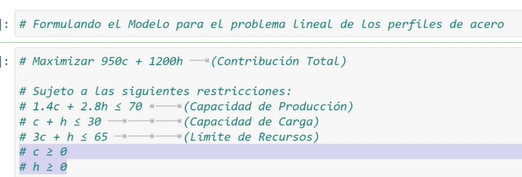

In [ ]:
import pyomo.environ as pyo

In [ ]:
# declarando modelo concreto
modelo = pyo.ConcreteModel()

Modelo tiene 3 partes

- Variables
- FO
- Restricciones

In [ ]:
# Variables, se ponen números en determinado orden para consultar cada variables en restricciones o en la FO
# c = 1
# h = 2
modelo.x = pyo.Var([1,2], domain = pyo.NonNegativeReals)

In [ ]:
# FO
modelo.objetivo = pyo.Objective(
    expr = 950*modelo.x[1] + 1200*modelo.x[2], sense = pyo.maximize
)

In [ ]:
# Declaración de restricciones
modelo.produccion = pyo.Constraint(
    expr = 1.4*modelo.x[1] + 2.8*modelo.x[2] <= 70
)

In [ ]:
modelo.carga = pyo.Constraint(
    expr = modelo.x[1] + modelo.x[2] <=30
)

In [ ]:
modelo.quimico = pyo.Constraint(
    expr = 3*modelo.x[1] + modelo.x[2] <= 65
)

**Aqui ya tenemos listo el modelo para resolverlo con el Solver glpk**

In [ ]:
pyo.SolverFactory('glpk').solve(modelo).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 33500.0
  Upper bound: 33500.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of nonzeros: 6
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005991935729980469
# ----------------------------------------------------------
#   Solution Information
# --------------------------------

**Recordar que pyomo no presenta analisis de sensibilidad (PULP)**

Pyomo es fuerte para resolver problema No lineales

In [ ]:
'''
Las variables de decisión serían
  c = 10
  h = 20
'''
modelo.display()

Model unknown

  Variables:
    x : Size=2, Index={1, 2}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  10.0 :  None : False : False : NonNegativeReals
          2 :     0 :  20.0 :  None : False : False : NonNegativeReals

  Objectives:
    objetivo : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 33500.0

  Constraints:
    produccion : Size=1
        Key  : Lower : Body : Upper
        None :  None : 70.0 :  70.0
    carga : Size=1
        Key  : Lower : Body : Upper
        None :  None : 30.0 :  30.0
    quimico : Size=1
        Key  : Lower : Body : Upper
        None :  None : 50.0 :  65.0
